In [1]:
#!unxz mnist.out.xz

In [1]:
from model import Model
from collections import namedtuple
import sys
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.seed(1)
np.random.seed(1)

Game = namedtuple('Game', ['env_name', 'input_size', 'output_size', 'wann_file', 'action_select', 'weight_bias'])
game = Game(env_name='MNISTTEST784-v0',
  input_size=784,
  output_size=10,
  wann_file='brain-tokyo-workshop/WANNRelease/WANNTool/champions/mnist784_best.out',
  action_select='softmax', # all, soft, hard
  weight_bias=0.0,
)
model = Model(game)
model.make_env()
model.env.seed(1)
model.load_model('brain-tokyo-workshop/WANNRelease/WANNTool/log/mnist784test.cma.4.32.best.json')

batch = model.env.reset()
output = model.get_action(batch)

loading file brain-tokyo-workshop/WANNRelease/WANNTool/log/mnist784test.cma.4.32.best.json


In [3]:
import os
import numpy as np
from skimage.transform import resize

MASK_PATH = os.path.join('rise_masks.npy')

#MASK_COUNT = 500
#s = 8
#p1 = 0.5

MASK_COUNT = 5000
s = 8
p1 = 0.5

def generate_masks(N, s, p1, input_size):
    cell_size = np.ceil(np.array(input_size) / s)
    up_size = (s + 1) * cell_size

    grid = np.random.rand(N, s, s) < p1
    grid = grid.astype('float32')

    masks = np.empty((N, *input_size))

    for i in range(N):
        # Random shifts
        x = np.random.randint(0, cell_size[0])
        y = np.random.randint(0, cell_size[1])
        # Linear upsampling and cropping
        masks[i, :, :] = resize(grid[i], up_size, order=1, mode='reflect',
                                anti_aliasing=False)[x:x + input_size[0], y:y + input_size[1]]
    masks = masks.reshape(-1, *input_size, 1)
    return masks


def explain(model, inp, masks, input_size):
    batch_size = 100
    preds = []
    # Make sure multiplication is being done for correct axes

    for i in range(0, MASK_COUNT, batch_size):
        sub_masks = masks[i:min(i + batch_size, MASK_COUNT)]
        masked = inp * sub_masks
        o = model.get_action(masked.reshape(batch_size, 28 * 28))
        preds.append(o)
    preds = np.concatenate(preds)
    sal = preds.T.dot(masks.reshape(MASK_COUNT, -1)).reshape(-1, *input_size)
    sal = sal / MASK_COUNT / p1
    return sal


masks = generate_masks(MASK_COUNT, s, p1, (28, 28))

label: 6
prediction 6
0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 1.00000, 0.00000, 0.00000, 0.00000
Prediction label changed
count 21
prediction 0
0.91323, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.08677, 0.00000, 0.00000, 0.00000


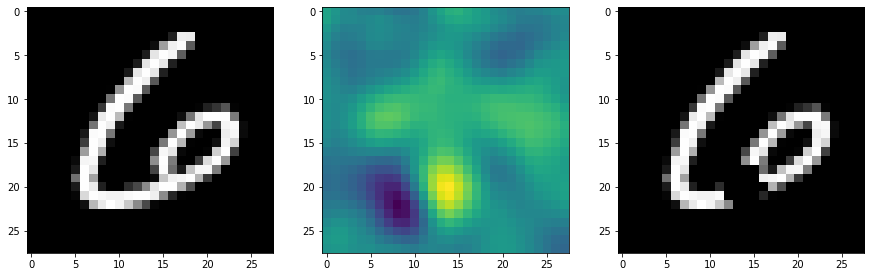

--------------------------------------------------------------------------------
label: 9
prediction 9
0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 1.00000
Prediction label changed
count 15
prediction 4
0.00000, 0.00000, 0.00000, 0.00000, 0.99966, 0.00000, 0.00000, 0.00000, 0.00000, 0.00034


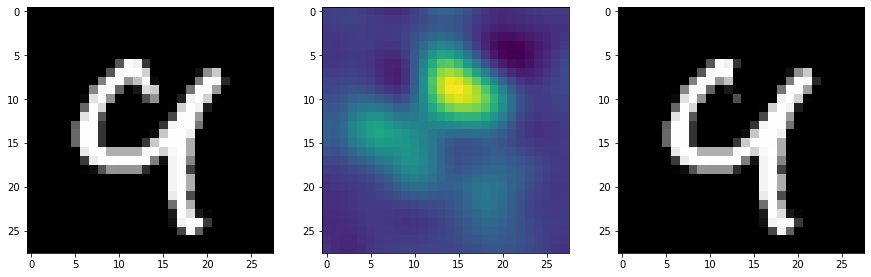

--------------------------------------------------------------------------------
label: 2
prediction 2
0.00000, 0.00000, 0.99273, 0.00000, 0.00000, 0.00000, 0.00727, 0.00000, 0.00000, 0.00000
Prediction label changed
count 5
prediction 6
0.00000, 0.00000, 0.02787, 0.00000, 0.00000, 0.00000, 0.97213, 0.00000, 0.00000, 0.00000


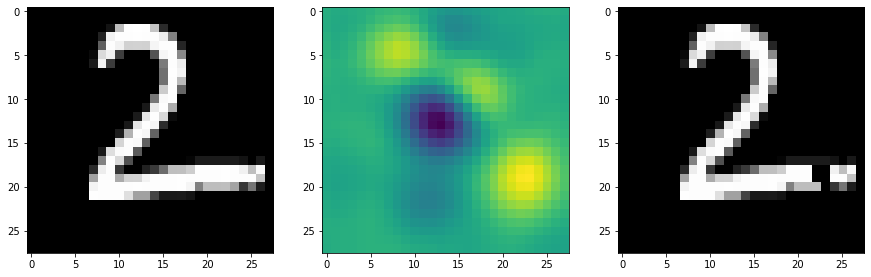

--------------------------------------------------------------------------------
label: 6
prediction 6
0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 1.00000, 0.00000, 0.00000, 0.00000
Classification result unchanged after modification
count 199
prediction 6
0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 1.00000, 0.00000, 0.00000, 0.00000


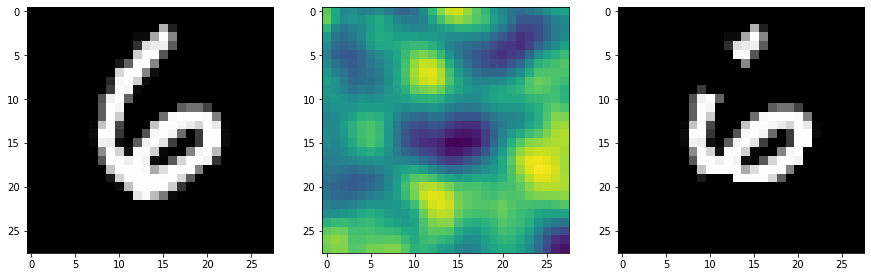

--------------------------------------------------------------------------------
label: 7
prediction 7
0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 1.00000, 0.00000, 0.00000
Classification result unchanged after modification
count 199
prediction 7
0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 1.00000, 0.00000, 0.00000


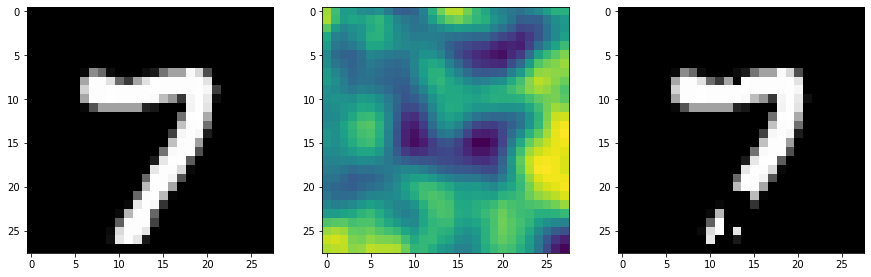

--------------------------------------------------------------------------------
label: 6
prediction 6
0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 1.00000, 0.00000, 0.00000, 0.00000
Classification result unchanged after modification
count 199
prediction 6
0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 1.00000, 0.00000, 0.00000, 0.00000


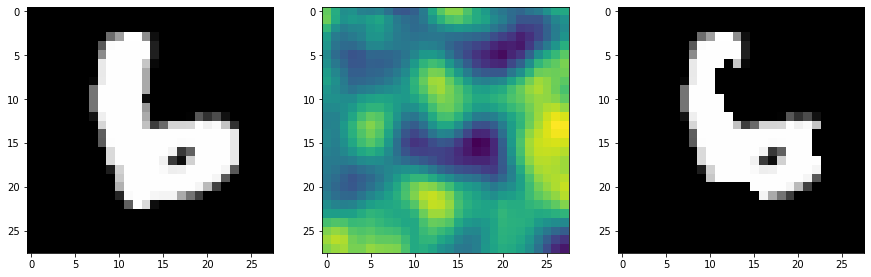

--------------------------------------------------------------------------------
label: 1
prediction 1
0.00000, 1.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000
Prediction label changed
count 13
prediction 7
0.00000, 0.10834, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.89166, 0.00000, 0.00000


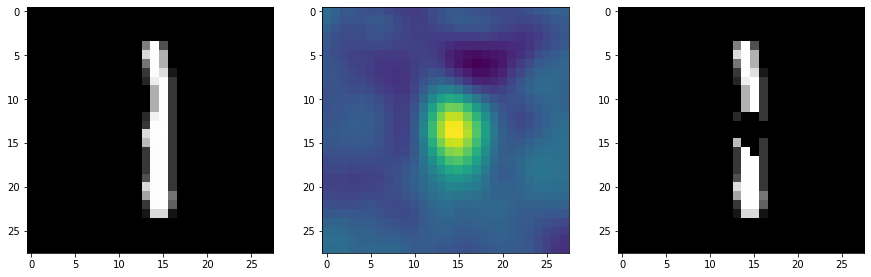

--------------------------------------------------------------------------------
label: 4
prediction 9
0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 1.00000
Network did not recognize unchanged image, skipping
label: 7
prediction 7
0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.99999, 0.00000, 0.00001
Prediction label changed
count 4
prediction 9
0.00000, 0.00000, 0.00946, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00003, 0.99051


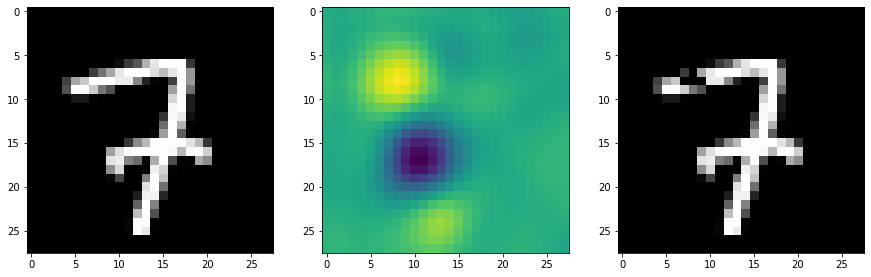

--------------------------------------------------------------------------------
label: 1
prediction 1
0.00000, 1.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000
Prediction label changed
count 26
prediction 8
0.00000, 0.00000, 0.01377, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.61264, 0.37359


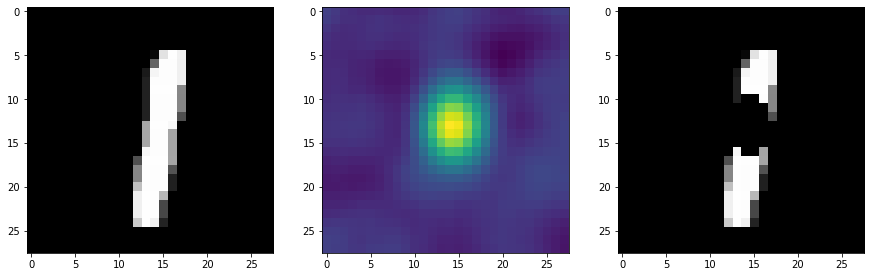

--------------------------------------------------------------------------------


In [9]:
def evaluate(index):
    image = batch[index]

    label = model.env.target[model.env.currIndx][index]

    print('label:', label)

    baseline = model.get_action([batch[index]])
    predicted_label = np.argmax(baseline[0])

    print('prediction', predicted_label)
    print(', '.join([f'{x:.5f}' for x in baseline[0]]))

    sal = explain(model, image.reshape(28, 28, 1), masks, (28, 28))

    if predicted_label != label:
        print('Network did not recognize unchanged image, skipping')
        return

    flat = sal[label].reshape(28*28)

    for count in range(1, 200):
        highest_indexes = np.argpartition(flat, -count)[-count:]

        modified_img = np.copy(image.reshape(28 * 28))
        modified_img[highest_indexes] = 0
        new_prediction = model.get_action([modified_img.reshape(28 * 28)])
        new_prediction_label = np.argmax(new_prediction[0])
        new_prediction_value = np.max(new_prediction[0])
        #print('count', count)
        #print('prediction', new_prediction_label)
        #print(', '.join([f'{x:.5f}' for x in new_prediction[0]]))

        if new_prediction_label != label:
            print('Prediction label changed')
            break
        if new_prediction_value < 0.8:
            print('Prediction confidence below 0.8')
            break
    else:
        print('Classification result unchanged after modification')

    print('count', count)
    print('prediction', new_prediction_label)
    print(', '.join([f'{x:.5f}' for x in new_prediction[0]]))
    figure, plots = plt.subplots(1, 3, figsize=(15, 5))
    plots[0].imshow(image.reshape(28, 28), cmap='Greys_r')
    plots[1].imshow(sal[label])
    plots[2].imshow(modified_img.reshape(28, 28), cmap='Greys_r')
    plt.show()

    print('-' * 80)

for index in range(10):
    evaluate(index)